# ví dụ trên Python

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

In [4]:
np.random.seed(18)
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis=0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N +[2]*N).T

In [5]:
def kmeans_display(X, label, filename='data.png'):
    X0 = X[label==0, :]
    X1 = X[label==1, :]
    X2 = X[label==2, :]

    kwargs = {"markersize": 5, 'alpha':.8, 'markeredgecolor':'k'}
    plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.plot()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

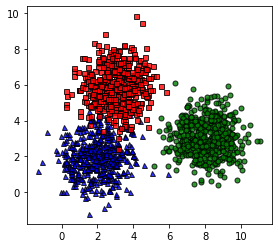

In [6]:
kmeans_display(X, original_label)

các hàm phụ trợ:
- `kmeans_init_centroids` khởi tạo các tâm cụm
- `kmeans_assign_labels` tìm nhãn tất cả các điểm khi biết tâm cụm
- `kmeans_update_centroids` cập nhật lại tâm cụm khi biết các cụm (nhãn của từng điểm)
- `has_converged` kiểm tra điều kiện dừng thuật toán (hội tụ)

In [7]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k)]

def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # return index of closest centroid
    return np.argmin(D, axis=1)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels==k, :]
        #take average
        centroids[k, :] = np.mean(Xk, axis=0)
    return centroids

def has_converged(centroids, new_centroids):
    # return True if two sets of centroids as the same
    return (set(tuple(a) for a in centroids)) == (set(tuple(a) for a in new_centroids))